# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

print(merged_data.head())


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [3]:
# Checking the number of mice.

num_mice = merged_data["Mouse ID"].nunique()

num_mice


249

In [4]:
# The data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_data.duplicated(subset=["Mouse ID", "Timepoint"])

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_data[duplicate_mice]

duplicate_rows



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)

# Extract all rows for duplicate mice
all_duplicate_rows = merged_data[duplicate_mice]

all_duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")


cleaned_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Check the number of mice in the cleaned DataFrame
num_mice_cleaned = cleaned_data["Mouse ID"].nunique()
num_mice_cleaned

# Personal Comment : I notice the umber is the same as the original one and that doesn't make sense to me. I imagine there's a mistake in my code somewhere, but I'm unsure of where. 

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by Drug Regimen and calculate summary statistics
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats_advanced = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])\
    .rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced

# Personal Commment: I'm unsure about this portion of the homework and am kinda confused

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

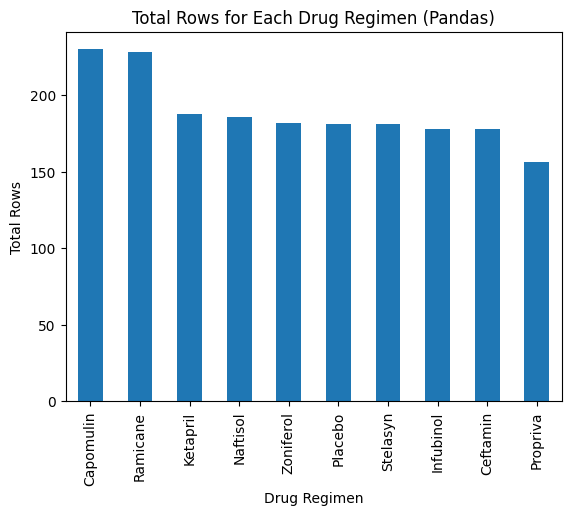

In [10]:
# Group by Drug Regimen and count the number of rows for each regimen using pandas

regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Plotting bar chart using DataFrame.plot() method
regimen_counts.plot(kind='bar', title='Total Rows for Each Drug Regimen (Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Rows')
plt.show()

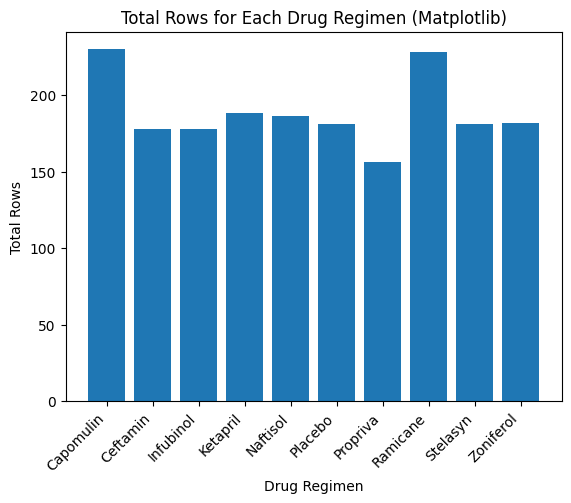

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot

regimen_counts = cleaned_data.groupby('Drug Regimen').size().reset_index(name='Total Rows')

# Plotting the bar plot using Matplotlib's pyplot methods
plt.bar(regimen_counts['Drug Regimen'], regimen_counts['Total Rows'])

# Adding labels and title
plt.title('Total Rows for Each Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Rows')

# To help with readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

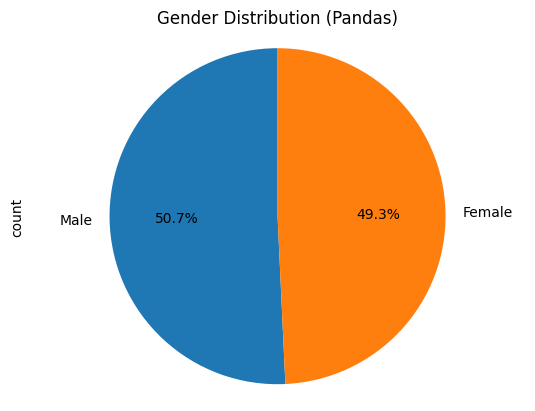

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_distribution = cleaned_data['Sex'].value_counts()

# Plotting pie chart using DataFrame.plot() method
gender_distribution.plot.pie(autopct='%1.1f%%', startangle=90, title='Gender Distribution (Pandas)')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()

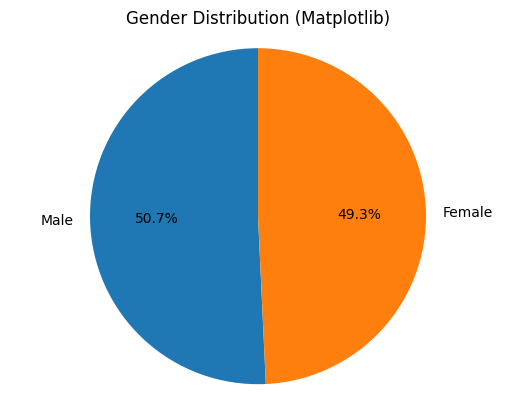

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution (Matplotlib)')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
selected_regimen_data = cleaned_data[cleaned_data['Drug Regimen'].isin(selected_regimens)]

# Create a grouped DataFrame that shows the last (greatest) time point for each mouse. Merge this grouped DataFrame with the original cleaned DataFrame.

last_timepoint_per_mouse = selected_regimen_data.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint_per_mouse).reset_index()
final_tumor_volume = pd.merge(last_timepoint_df, cleaned_data, on=['Mouse ID', 'Timepoint'], how='inner')

#Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

#Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. 

for treatment in treatments: 
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    
    # Append the resulting final tumor volumes for each drug to the empty list.
    tumor_volume_data.append(treatment_data['Tumor Volume (mm3)']) 

    # Calculate quartiles, IQR, and identify potential outliers
    quartiles = treatment_data['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    # Identify Outliers
    outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | (treatment_data['Tumor Volume (mm3)'] > upper_bound)]


    # Print Result 
    print(f"Outliers for {treatment}: {outliers[['Mouse ID', 'Tumor Volume (mm3)']]}")

print(final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])










Outliers for Capomulin: Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []
Outliers for Ramicane: Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []
Outliers for Infubinol:    Mouse ID  Tumor Volume (mm3)
15     c326           36.321346
Outliers for Ceftamin: Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []
   Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0      a203    Infubinol         45           67.973419
1      a251    Infubinol         45           65.525743
2      a275     Ceftamin         45           62.999356
3      a411     Ramicane         45           38.407618
4      a444     Ramicane         45           43.047543
..      ...          ...        ...                 ...
95     y769     Ceftamin         45           68.594745
96     y793    Capomulin         45           31.896238
97     y865     Ceftamin         45           64.729837
98     z578     Ramicane         45           30.638696
99     z581    Infubinol    

In [15]:
# List of treatments for the for loop and plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for plotting
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the list
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR for the current treatment regimen
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Identify potential outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print results
    print(f"Outliers for {treatment}: {outliers}")

# Display the list of tumor volume data for each treatment
print("Tumor Volume Data for Plotting:")
print(tumor_vol_data)



Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Tumor Volume Data for Plotting:
[9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64, 3     38.407618
4     43.047543
5     38.810366
7     32.978522
16    38.342008
17    33.397653
19    37.311236
21    40.659006
27    29.128472
29    33.562402
30    36.374510
37    31.560470
38    36.134852
40    2

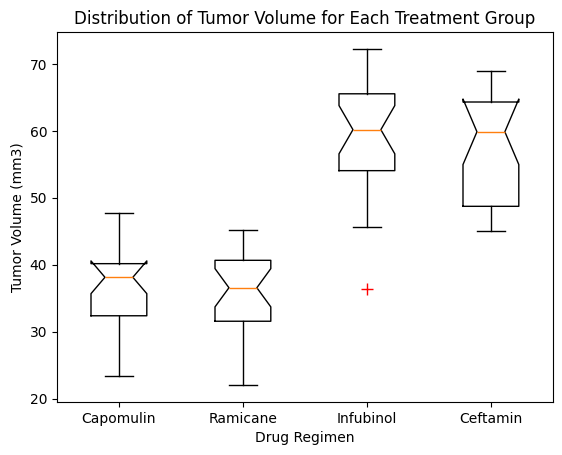

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Import necessary libraries
import matplotlib.pyplot as plt

# List of treatments for the box plot
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list of tumor volume data for plotting
tumor_vol_data = [final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'] for treatment in treatments]

# Plotting the box plot
plt.boxplot(tumor_vol_data, labels=treatments, notch=True, sym='r+')


# Highlighting outliers with a different color and style
for flier in plt.gca().get_children():
    if isinstance(flier, plt.Line2D):
        flier.set(markerfacecolor='red', markersize=8)

# Adding labels and title
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()


## Line and Scatter Plots

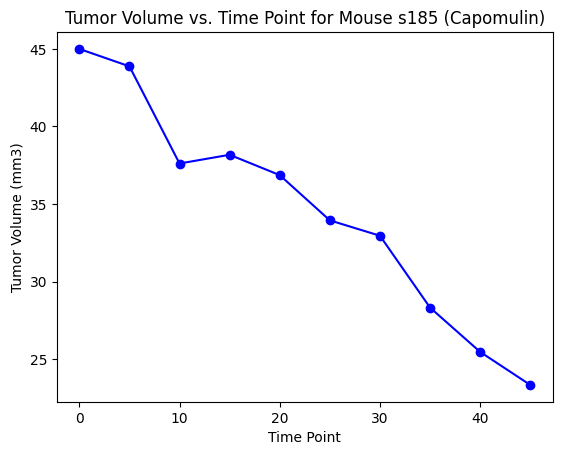

In [22]:

# Choose a single mouse treated with Capomulin (replace 'Mouse_ID' with the actual ID)
selected_mouse_id = 's185'
selected_mouse_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == selected_mouse_id)]

# Plotting the line plot
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()



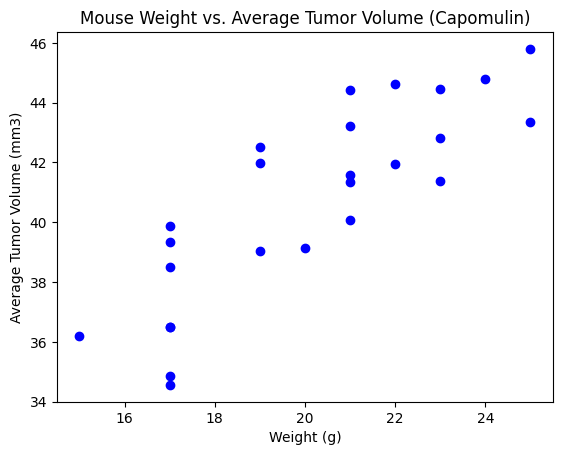

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse metadata to get the weight
merged_data_capomulin = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='inner')

# Plotting the scatter plot
plt.scatter(merged_data_capomulin['Weight (g)'], merged_data_capomulin['Tumor Volume (mm3)'], marker='o', color='b')

# Adding labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse metadata to get the weight
merged_data_capomulin = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='inner')

# Calculate the correlation coefficient
correlation_coefficient = merged_data_capomulin['Weight (g)'].corr(merged_data_capomulin['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data_capomulin['Weight (g)'], merged_data_capomulin['Tumor Volume (mm3)'])

# Create the linear regression line
regression_line = slope * merged_data_capomulin['Weight (g)'] + intercept

regression_line


0     42.549834
1     41.595394
2     37.777635
3     39.686515
4     42.549834
5     44.458713
6     40.640954
7     43.504273
8     41.595394
9     41.595394
10    39.686515
11    37.777635
12    39.686515
13    45.413153
14    37.777635
15    45.413153
16    37.777635
17    43.504273
18    37.777635
19    37.777635
20    41.595394
21    43.504273
22    41.595394
23    35.868756
24    37.777635
Name: Weight (g), dtype: float64

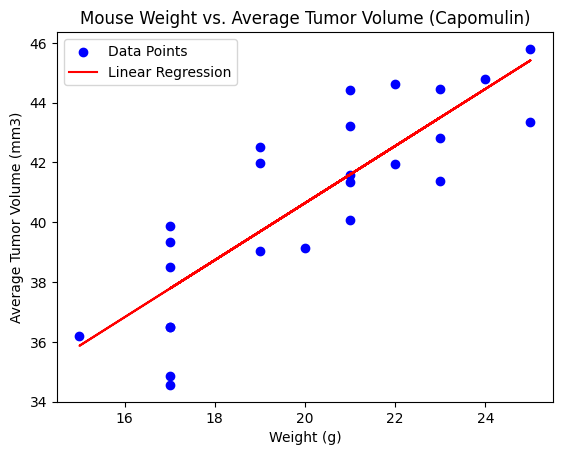

Correlation Coefficient: 0.8419363424694721


In [21]:
# Plotting the scatter plot with regression line
plt.scatter(merged_data_capomulin['Weight (g)'], merged_data_capomulin['Tumor Volume (mm3)'], marker='o', color='b', label='Data Points')
plt.plot(merged_data_capomulin['Weight (g)'], regression_line, color='r', label='Linear Regression')

# Adding labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.legend()
plt.show()

# Display the correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")